<a href="https://www.kaggle.com/code/shaikhabdulrafay03/mnist-as-unsupervised-data?scriptVersionId=166579993" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [32]:
import pandas as pd
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


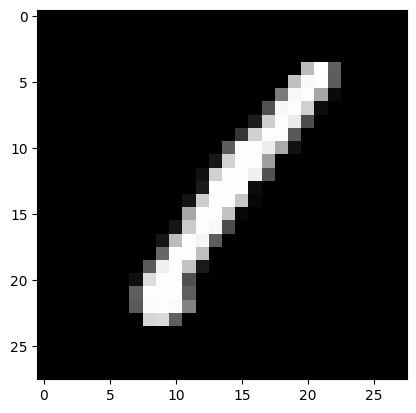

In [33]:
import matplotlib.pyplot as plt
import numpy as np
pixels = train.iloc[0, 1:]  
image = pixels.values.reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.show()

In [34]:
print("DataSet Information:")
print("-" * 30)
print('DF Shape: ' ,train.shape)
print('number of Columns: ' ,len(train.columns))
print('number of Observations: ' ,len(train))
print('Number of values in train: ' , train.count().sum())
print('Total Number of Missing values in train: ' , train.isna().sum().sum())
print('percentage of Missing values : ' ,  "{:.2f}".format(train.isna().sum().sum()/train.count().sum() *100),'%')
print('Total Number of Duplicated records in train : ' , train.duplicated().sum().sum())
print('percentage of Duplicated values : ' ,  "{:.2f}".format(train.duplicated().sum().sum()/train.count().sum() *100),'%')


DataSet Information:
------------------------------
DF Shape:  (42000, 785)
number of Columns:  785
number of Observations:  42000
Number of values in train:  32970000
Total Number of Missing values in train:  0
percentage of Missing values :  0.00 %
Total Number of Duplicated records in train :  0
percentage of Duplicated values :  0.00 %


In [35]:
train['label'].value_counts().sort_index(ascending=True)


label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64

In [36]:
from tensorflow import keras

y = train.pop('label')
y_train = keras.utils.to_categorical(y, 10)

In [37]:
X_train = train/255
test = test / 255

In [38]:
from sklearn.model_selection import train_test_split

# Assuming 'your_data' is your DataFrame and 'your_labels' is the corresponding label column
X_train, X_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (29400, 784) (29400, 10)
Validation set: (6300, 784) (6300, 10)
Test set: (6300, 784) (6300, 10)


In [39]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def db(model):
    
    # Assuming X_train is a DataFrame
    X_train_array = X_train.to_numpy()  # Convert DataFrame to NumPy array

    # Flatten the input data
    X_train_flattened = X_train_array.reshape(X_train_array.shape[0], -1)

    pca = PCA(n_components=2)
    train_images_pca = pca.fit_transform(X_train_flattened)

    x_min, x_max = train_images_pca[:, 0].min() - 50, train_images_pca[:, 0].max() + 50
    y_min, y_max = train_images_pca[:, 1].min() - 50, train_images_pca[:, 1].max() + 50
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 10),
                         np.arange(y_min, y_max, 10))

    meshgrid_points = np.c_[xx.ravel(), yy.ravel()]
    meshgrid_points_original = pca.inverse_transform(meshgrid_points)
    meshgrid_points_original = meshgrid_points_original.reshape(-1, 28, 28)

    # Flatten the meshgrid points
    meshgrid_points_flattened = meshgrid_points_original.reshape(meshgrid_points_original.shape[0], -1)

    predictions = model_final.predict(meshgrid_points_flattened)
    Z = np.argmax(predictions, axis=1)
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Decision Boundary')
    plt.show()

# Supervised Model

/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.6512 - loss: 1.1694 - val_accuracy: 0.8503 - val_loss: 0.7737
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.9159 - loss: 0.2812 - val_accuracy: 0.9000 - val_loss: 0.3708
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9328 - loss: 0.2102 - val_accuracy: 0.9354 - val_loss: 0.2045
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9558 - loss: 0.1487 - val_accuracy: 0.9549 - val_loss: 0.1446
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9571 - loss: 0.1357 - val_accuracy: 0.9597 - val_loss: 0.1301
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9637 - loss: 0.1131 - val_accuracy: 0.9625 - val_loss: 0.1204
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9678 - loss: 0.0985 - val_accuracy: 0.9676 - val_loss: 0.1079
Epoch 8/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9724 - loss: 0.0829 - val_accuracy: 0.

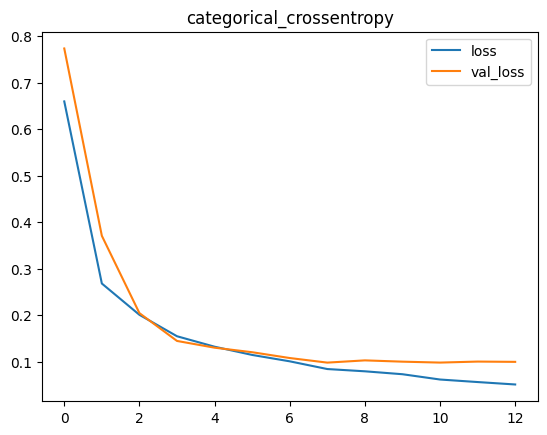

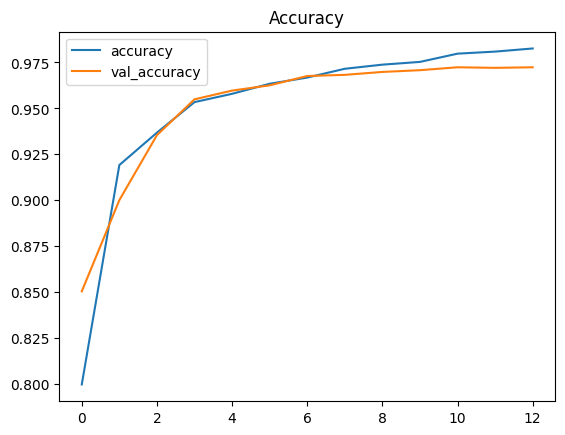

In [40]:
from tensorflow.keras import layers, models, regularizers, initializers
model2 = keras.Sequential([
    layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])

model2.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="categorical_crossentropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

print('Test Loss and Accuracy : ' ,model2.evaluate(X_test , y_test))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


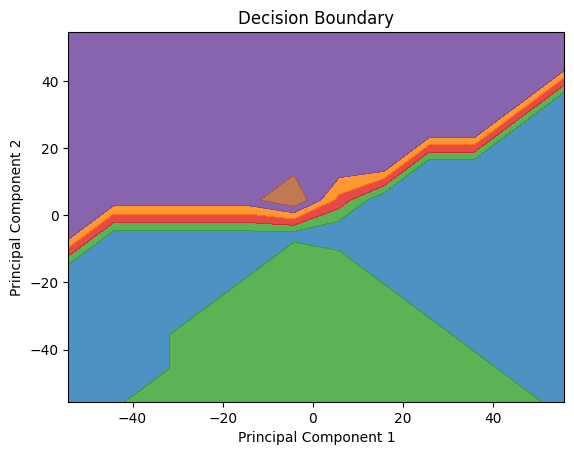

In [41]:
db(model)

In [42]:
# Save the weights
model2.save_weights('supervised_pretraining.weights.h5')


# Unsupervised AutoEncoder

Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.4703 - val_loss: 0.2295
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2120 - val_loss: 0.1757
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1680 - val_loss: 0.1504
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1455 - val_loss: 0.1342
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.1308 - val_loss: 0.1228
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1196 - val_loss: 0.1138
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1111 - val_loss: 0.1072
Epoch 8/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.1048 - val_loss: 0.1019
Epoch 9/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.1000 - val_loss: 0.0977
Epoch 10/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0959 - val_loss: 0.0942
Epoch 11/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.0925 - val_loss: 0.0911
Epoch 12/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step

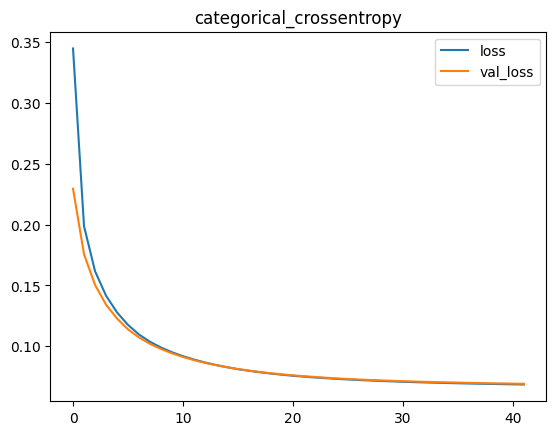

In [43]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define an autoencoder architecture
input_layer = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_layer)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

history = autoencoder.fit(X_train, X_train, 
                          validation_data=(X_val, X_val), 
                          epochs=200,
                          batch_size=512,
                         callbacks=[early_stopping])
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="categorical_crossentropy")

print('Test Loss and Accuracy : ' ,autoencoder.evaluate(X_test , X_test))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


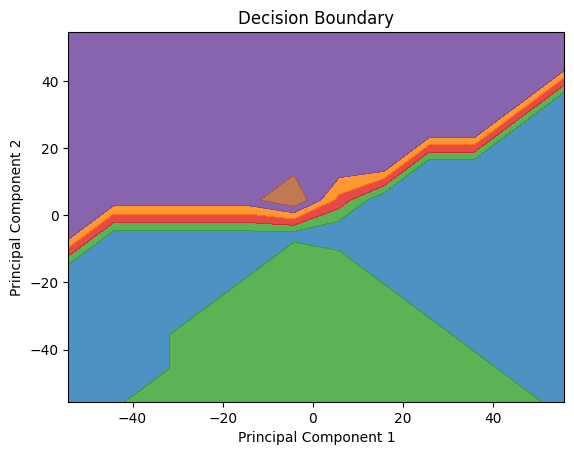

In [44]:
db(autoencoder)

# Combined Model

/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.5978 - loss: 1.3205 - val_accuracy: 0.8411 - val_loss: 0.6754
Epoch 2/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9032 - loss: 0.3127 - val_accuracy: 0.8879 - val_loss: 0.3704
Epoch 3/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9258 - loss: 0.2396 - val_accuracy: 0.9286 - val_loss: 0.2321
Epoch 4/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.9412 - loss: 0.1876 - val_accuracy: 0.9433 - val_loss: 0.1807
Epoch 5/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9525 - loss: 0.1518 - val_accuracy: 0.9541 - val_loss: 0.1538
Epoch 6/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9593 - loss: 0.1278 - val_accuracy: 0.9611 - val_loss: 0.1291
Epoch 7/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9661 - loss: 0.1124 - val_accuracy: 0.9648 - val_loss: 0.1227
Epoch 8/200
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9672 - loss: 0.1036 - val_accuracy: 0.

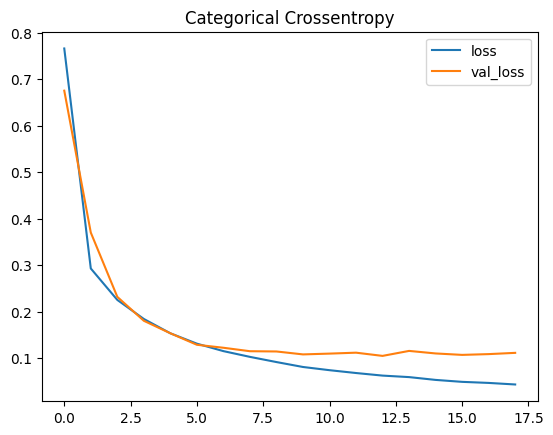

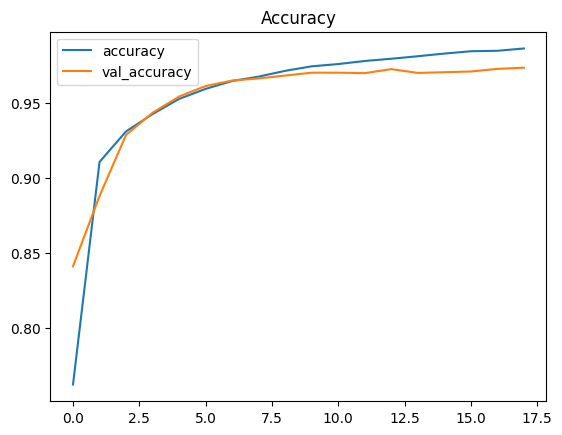

In [45]:
# Combined Model
model_final = keras.Sequential([
    layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    layers.Dense(256, activation='relu'),
    layers. BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
     Dense(128, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax'),
])

model_final.layers[-5].set_weights(autoencoder.layers[-3].get_weights()) 



model_final.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)

early_stopping_final = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

history_final = model_final.fit(
    X_train, y_train,  
    validation_data=(X_val, y_val),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping_final],
)

history_df_final = pd.DataFrame(history_final.history)
history_df_final.loc[:, ['loss', 'val_loss']].plot(title="Categorical Crossentropy")
history_df_final.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

print('Test Loss and Accuracy:', model_final.evaluate(X_test, y_test))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


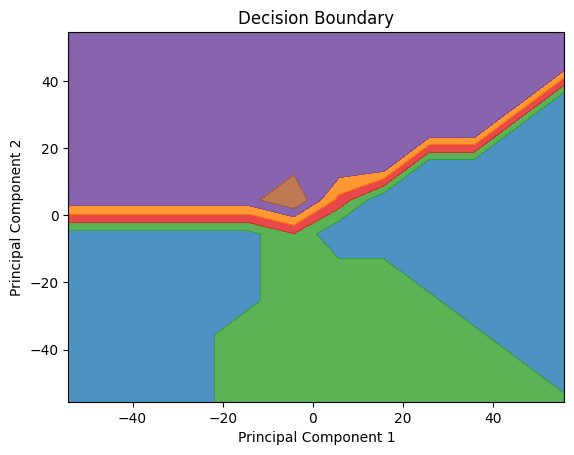

In [46]:
db(model)

In [47]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers, initializers
from scipy.stats import uniform, randint
import numpy as np

# Assuming X_train, y_train, X_test, y_test are your data
# Adjust the hyperparameter lists based on your requirements
regularization = [True, False]
batch_sizes = [32, 64, 128, 256]
learning_rates = uniform(loc=0.0001, scale=0.1)

n_splits = 5

# Create a dictionary of hyperparameters and their possible values
param_dist = {
    'lr': learning_rates,
    'batch_size': batch_sizes,
    'reg': regularization
}

random_search_results = []

n_iter = 10
for _ in range(n_iter):
    hyperparams = {key: np.random.choice(values) if key != 'lr' else values.rvs() for key, values in param_dist.items()}

    accuracies = []

    model = Sequential([
        layers.BatchNormalization(input_shape=[X_train.shape[1]]),
        layers.Dense(256, activation='relu', kernel_regularizer=(regularizers.l1_l2(l1=1e-5, l2=1e-4) if hyperparams['reg'] else None),
                     kernel_initializer=(initializers.GlorotNormal()),
                     bias_initializer=initializers.Zeros()),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu', kernel_regularizer=(regularizers.l1_l2(l1=1e-5, l2=1e-4) if hyperparams['reg'] else None),
                     kernel_initializer=(initializers.GlorotNormal()),
                     bias_initializer=initializers.Zeros()),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(512, activation='relu', kernel_regularizer=(regularizers.l1_l2(l1=1e-5, l2=1e-4) if hyperparams['reg'] else None),
                     kernel_initializer=(initializers.GlorotNormal() ),
                     bias_initializer=initializers.Zeros()),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        layers.Dense(10, activation='sigmoid'),
    ])

    model.compile(
        optimizer=Adam(learning_rate=hyperparams['lr']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        batch_size=hyperparams['batch_size'],
        epochs=200,
        callbacks=[early_stopping],
        verbose=0,
    )

    y_pred_val = (model.predict(X_val) > 0.5).astype(int)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    accuracies.append(accuracy_val)

    avg_accuracy = sum(accuracies) / len(accuracies)

    random_search_results.append((hyperparams['lr'], hyperparams['batch_size'], hyperparams['reg'], avg_accuracy))

best_hyperparams = max(random_search_results, key=lambda x: x[-1])

print("Best Hyperparameters:")
print("Learning Rate:", best_hyperparams[0])
print("Batch Size:", best_hyperparams[1])
print("Regularization:", best_hyperparams[2])
print("Average Accuracy:", best_hyperparams[3])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Best Hyperparameters:
Learning Rate: 0.029886975499542834
Batch Size: 32
Regularization: False
Average Accuracy: 0.049206349206349205


/opt/conda/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9694 - loss: 0.1099
Test Loss and Accuracy: [0.11148617416620255, 0.970634937286377]


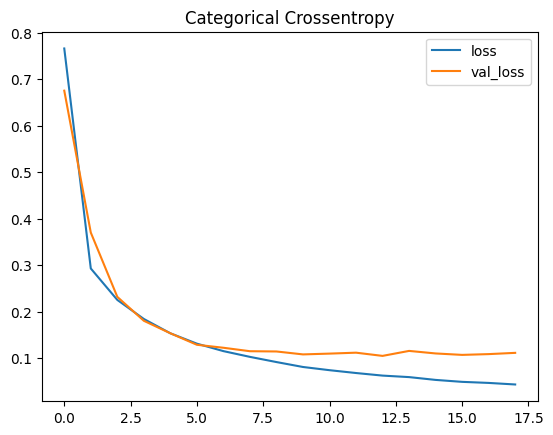

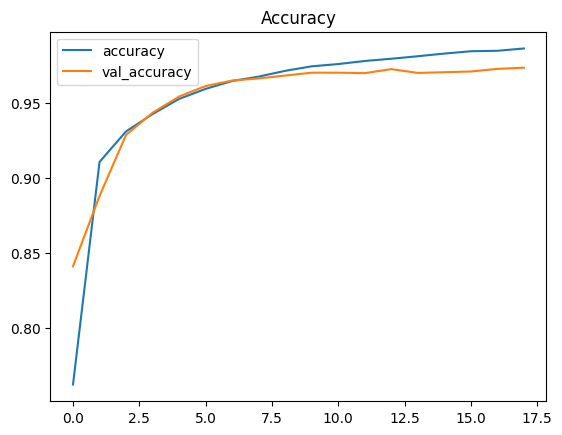

In [52]:
model = Sequential([
layers.BatchNormalization(input_shape=[X_train.shape[1]]),
layers.Dense(256, activation='relu', 
             kernel_regularizer=(None),
             kernel_initializer=initializers.GlorotNormal(),
             bias_initializer=initializers.Zeros()),
layers.BatchNormalization(),
layers.Dropout(0.3),
layers.Dense(256, activation='relu', 
             kernel_regularizer=(None),
             kernel_initializer=initializers.GlorotNormal(),
             bias_initializer=initializers.Zeros()),
layers.BatchNormalization(),
layers.Dropout(0.3),
layers.Dense(512, activation='relu', 
             kernel_regularizer=(None ),
             kernel_initializer=initializers.GlorotNormal(),
             bias_initializer=initializers.Zeros()),
layers.BatchNormalization(),
layers.Dropout(0.3),
layers.Dense(10, activation='sigmoid'),
])

model.compile(
    optimizer=Adam(learning_rate=0.029886975499542834),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        batch_size=32,
        epochs=200,
        callbacks=[early_stopping],
        verbose=0,
    )

history_df_final = pd.DataFrame(history_final.history)
history_df_final.loc[:, ['loss', 'val_loss']].plot(title="Categorical Crossentropy")
history_df_final.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

print('Test Loss and Accuracy:', model_final.evaluate(X_test, y_test))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


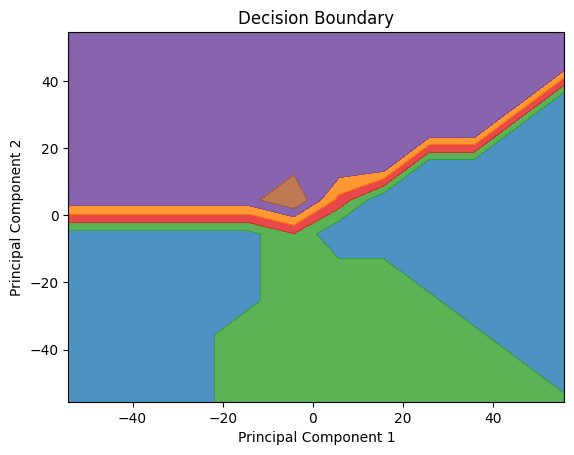

In [53]:
db(model)

- the model with unsupervised representation performed similar to the model that was tuned using randomsearch
- both models got around 97% accuracy on test data
